# "You are not my type"

Using https://data.medicare.gov/Hospital-Compare/Hospital-Acquired-Condition-Reduction-Program/yq43-i98g

In October 2014, CMS began reducing Medicare payments for subsection (d) hospitals that rank in the worst performing quartile with respect to hospital-acquired conditions (HACs). Hospitals with a Total HAC Score above the 75th percentile of the Total HAC Score distribution may be subject to the payment reduction. This table contains a hospital’s measure, domain and Total HAC scores. The domain scores comprise the Total HAC Score."

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/Hospital-Acquired_Condition_Reduction_Program.csv')

In [3]:
df.describe(include='all')

,Hospital_Name,Provider ID,State,Fiscal Year,Domain_1_Score,Domain_1_Footnote,Domain_1_Start_Date,Domain_1_End_Date,PSI_90_W_Z_Score,PSI_90_Footnote,...,MRSA_W_Z_Score,MRSA_Footnote,CDI_W_Z_Score,CDI_Footnote,Domain_2_Start_Date,Domain_2_End_Date,Total_HAC_Score,Total_HAC_Footnote,Payment_Reduction,Payment_Reduction_Footnote
count,3306,3306.000000,3306,3306.0,3306,73.000000,3306,3306,3306,73.000000,...,3306,1167.000000,3306,320.000000,3306,3306,3306,108.000000,3259,47
unique,3200,NaN,51,NaN,2716,NaN,1,1,2716,NaN,...,1102,NaN,1137,NaN,1,1,2972,NaN,2,1
top,MEMORIAL HOSPITAL,NaN,TX,NaN,2.3268,NaN,07/01/2014,09/30/2015,2.3268,NaN,...,Not Available,NaN,Not Available,NaN,01/01/2015,12/31/2016,Not Available,NaN,No,a
freq,8,NaN,312,NaN,163,NaN,3306,3306,163,NaN,...,1139,NaN,292,NaN,3306,3306,87,NaN,2508,47
mean,NaN,263470.612825,NaN,2018.0,NaN,5.712329,NaN,NaN,NaN,5.712329,...,NaN,5.311911,NaN,6.137500,NaN,NaN,NaN,6.638889,NaN,NaN
std,NaN,162544.512184,NaN,0.0,NaN,4.312383,NaN,NaN,NaN,4.312383,...,NaN,1.990213,NaN,3.679116,NaN,NaN,NaN,5.369450,NaN,NaN
min,NaN,10001.000000,NaN,2018.0,NaN,1.000000,NaN,NaN,NaN,1.000000,...,NaN,5.000000,NaN,5.000000,NaN,NaN,NaN,4.000000,NaN,NaN
25%,NaN,110124.250000,NaN,2018.0,NaN,5.000000,NaN,NaN,NaN,5.000000,...,NaN,5.000000,NaN,5.000000,NaN,NaN,NaN,4.000000,NaN,NaN
50%,NaN,250123.500000,NaN,2018.0,NaN,5.000000,NaN,NaN,NaN,5.000000,...,NaN,5.000000,NaN,5.000000,NaN,NaN,NaN,5.000000,NaN,NaN
75%,NaN,390138.750000,NaN,2018.0,NaN,5.000000,NaN,NaN,NaN,5.000000,...,NaN,5.000000,NaN,5.000000,NaN,NaN,NaN,5.000000,NaN,NaN


We've learned that CMS has 'Not Available' as value, so we will reset that for numerical columns.

In [4]:
for col in df.columns:
    try:
        df[col][df[col] == 'Not Available'] = np.nan
    except TypeError:
        pass

anaconda3_5/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


TypeError: cannot perform reduce with flexible type

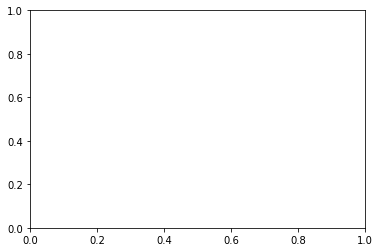

In [5]:
sns.boxplot(df['Domain_1_Score'][df.State=='NC'])

In [6]:
df['Domain_1_Score'].unique()

array(['-1.2795', '-0.0362', '0.0340', ..., '0.0033', '0.0077', '0.4497'], dtype=object)

In [7]:
for col in df.columns:
    if df.dtypes[col] =='object':
        try:
            df[col] = df[col].astype(float)
        except ValueError:
            pass

# Distribution

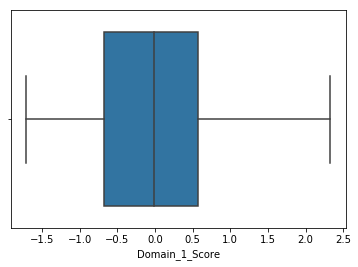

In [8]:
sns.boxplot(df['Domain_1_Score'][df.State=='NC'])

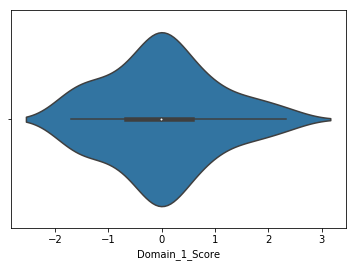

In [9]:
sns.violinplot(df['Domain_1_Score'][df.State=='NC']);

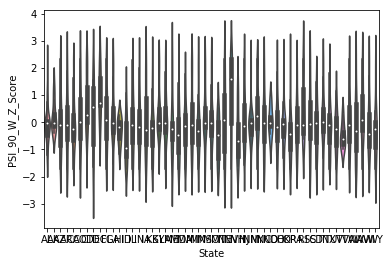

In [10]:
sns.violinplot(x='State', y='PSI_90_W_Z_Score', data=df);

In [11]:
from stemgraphic.num import stem_graphic, density_plot

  warnings.warn("This figure includes Axes that are not compatible "


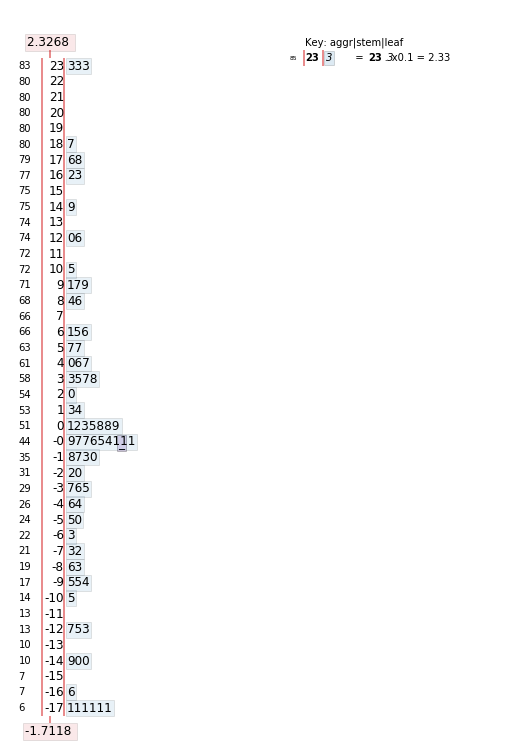

In [12]:
stem_graphic(df[df.State=='NC']['PSI_90_W_Z_Score']);

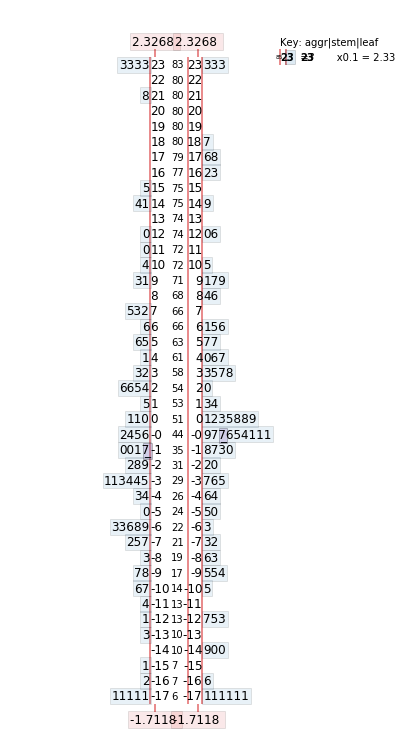

In [13]:
stem_graphic(df[df.State=='NC']['PSI_90_W_Z_Score'], df[df.State=='VA']['PSI_90_W_Z_Score']);

In [14]:
help(density_plot)

Help on function density_plot in module stemgraphic.graphic:

density_plot(df, var=None, ax=None, bins=None, box=None, density=True, density_fill=True, display=1000, fig_only=True, fit=None, hist=None, hues=None, hue_labels=None, jitter=None, kind=None, leaf_order=1, legend=True, limit_var=False, norm_hist=None, random_state=None, rug=None, scale=None, singular=True, strip=None, swarm=None, title=None, violin=None, x_min=0, x_max=None, y_axis_label=True)
    density_plot.
    
    Various density and distribution plots conveniently packaged into one function. Density plot normally forces
    tails at each end which might go beyond the data. To force min/max to be driven by the data, use limit_var.
    To specify min and max use x_min and x_max instead. Nota Bene: defaults to _decimation_ and _quantization_ mode.
    
    See density_plot notebook for examples of the different combinations of plots.
    
    Why this instead of seaborn:
    
    Stem-and-leaf plots naturally quantize da

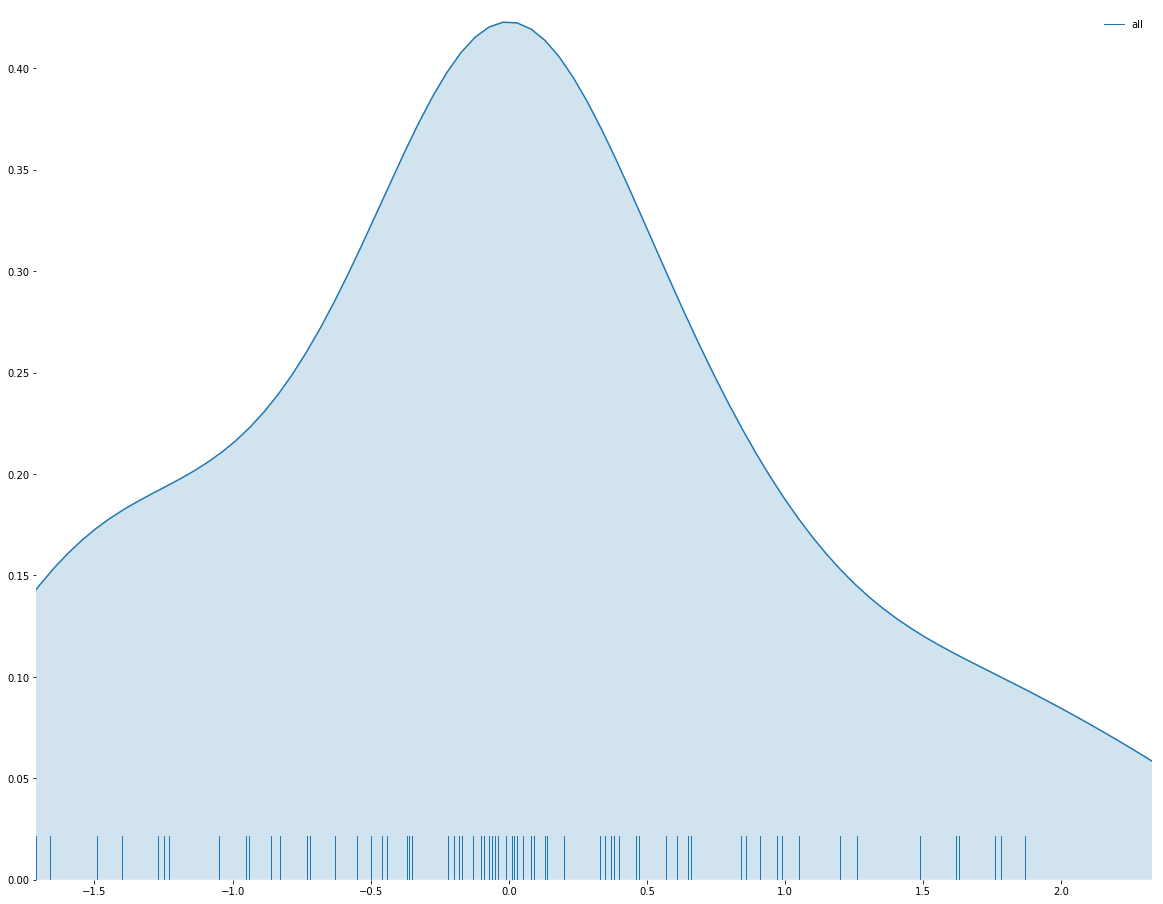

In [15]:
density_plot(df[df.State=='NC']['PSI_90_W_Z_Score'], limit_var=True, rug=True);